In [1]:
pip install millify



  Created wheel for millify: filename=millify-0.1.1-py3-none-any.whl size=1873 sha256=5db39185f895518df3e9a540800de65d4f3aa2fa2e4aab80289f794eed551539
  Stored in directory: c:\users\sakshi\appdata\local\pip\cache\wheels\04\6f\57\7abe8a4f093f486f9169644c5b063d1db08823d8ec525fd3f0
Successfully built millify


In [6]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 


from millify     import millify
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv("covid19_tweets.csv")
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [9]:
print("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]))

There are 179108 rows and 13 columns in the dataset.


In [3]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=4ec7a54526be47ed9f1c8c86f53b7832b3c79d26a97303efad16bf897cb06971
  Stored in directory: c:\users\sakshi\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [11]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

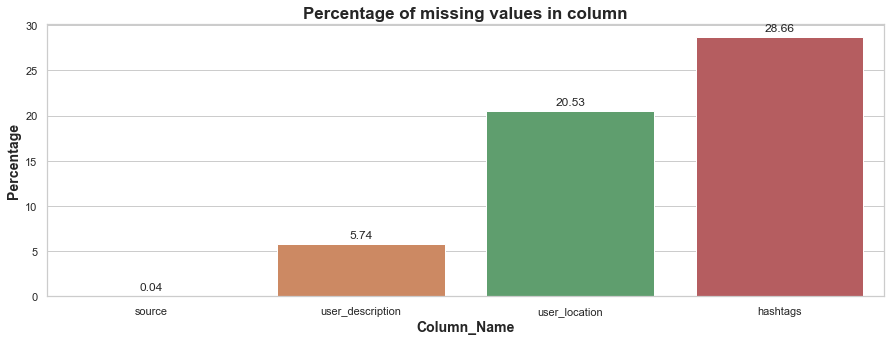

In [12]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()


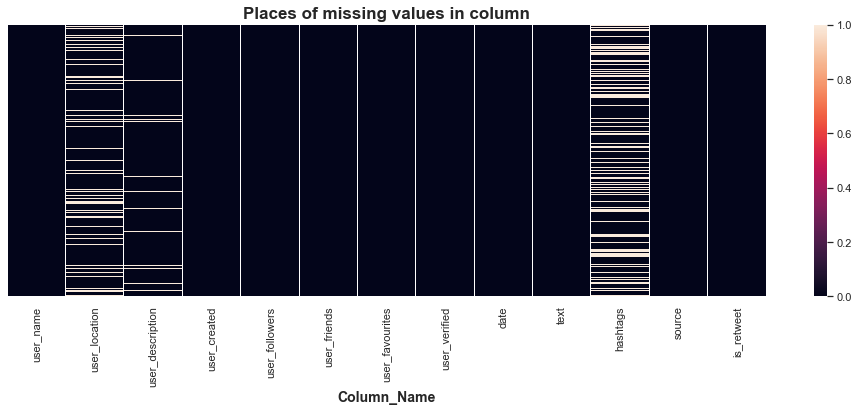

In [13]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

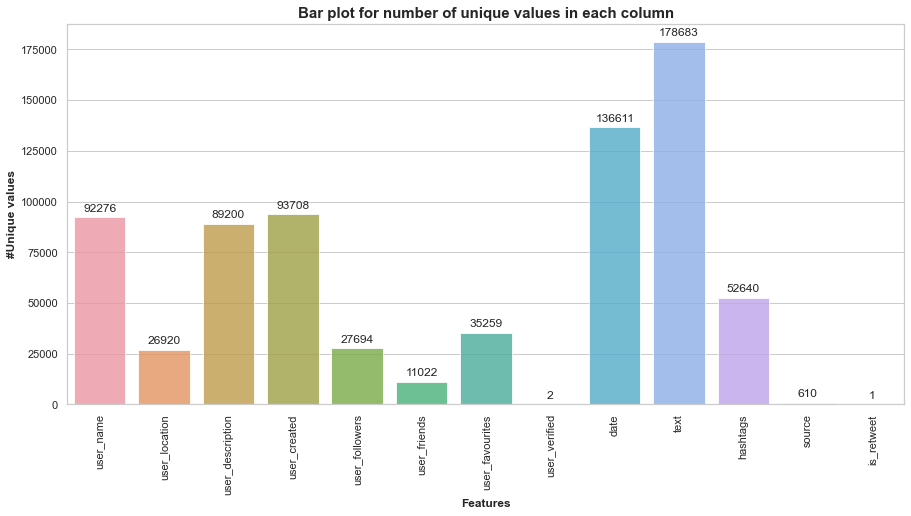

In [14]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

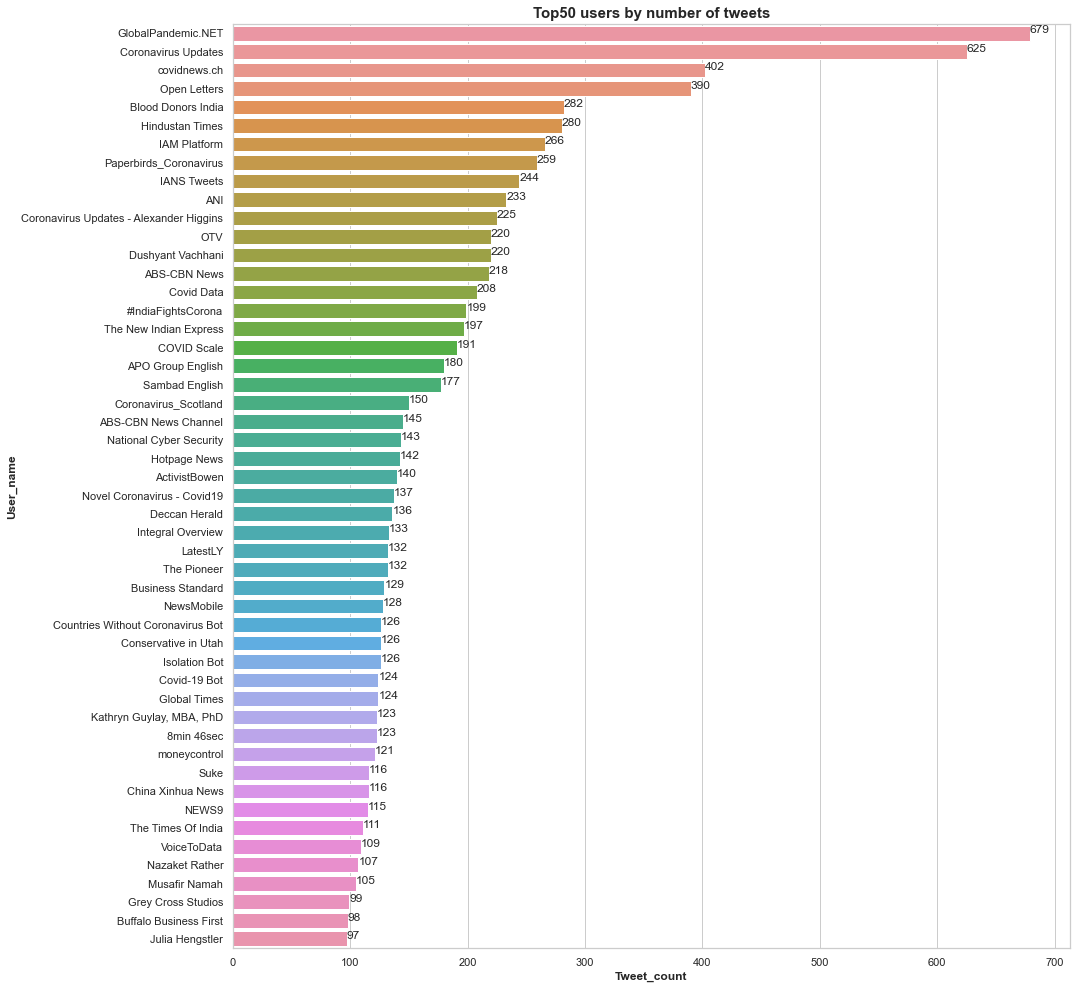

In [15]:
df_username_count = df['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'tweet_count','index':'user_name'})

plt.figure(figsize=(15, 17))
sns.barplot(y='user_name',x='tweet_count',data=df_username_count.head(50))
y=df_username_count['tweet_count'].head(50)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top50 users by number of tweets',weight='bold', size=15)
plt.ylabel('User_name', size=12, weight='bold')
plt.xlabel('Tweet_count', size=12, weight='bold')
plt.show()

In [16]:
fig = px.treemap(df_username_count.head(50), path=['user_name'], values='tweet_count',
                title="<b>TreeMap for Top50 users by number of tweets</b>") 

fig.show()


In [17]:
df = pd.merge(df, df_username_count, on='user_name')

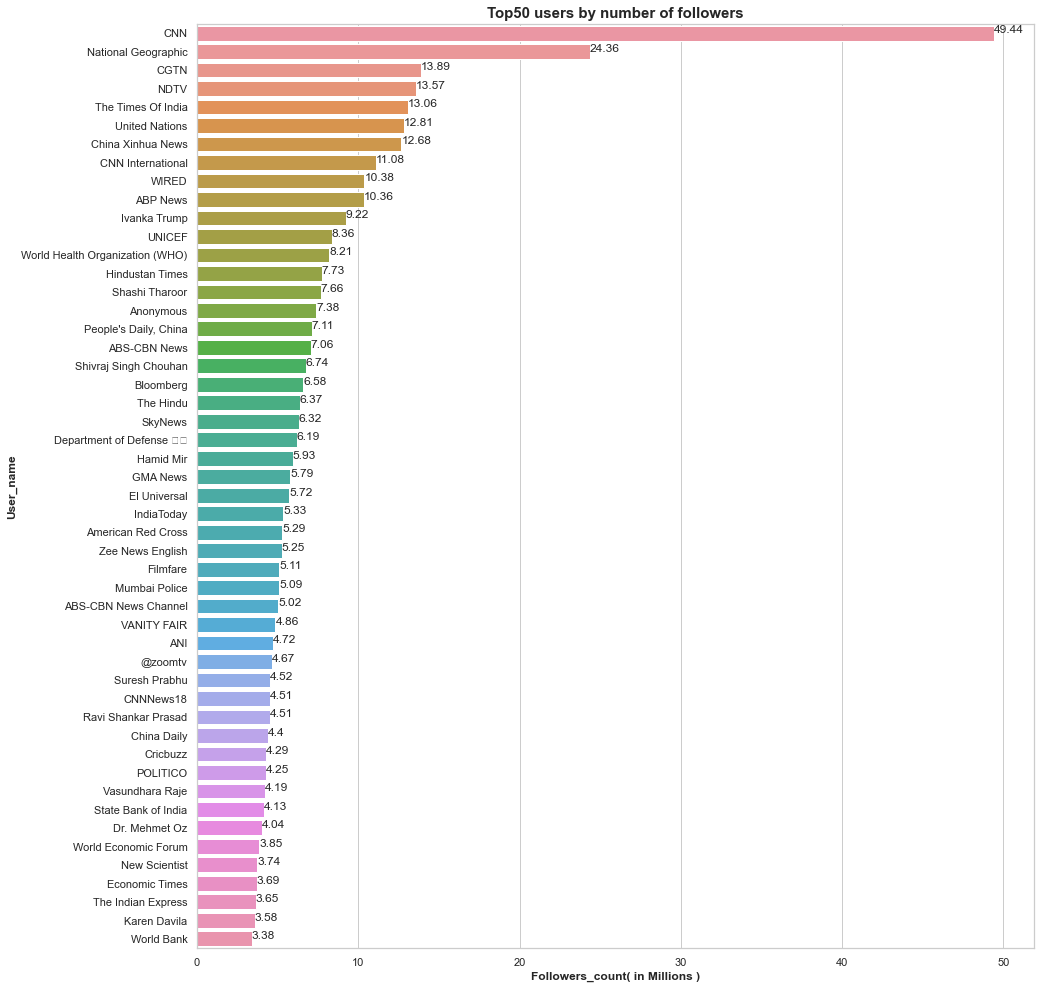

In [18]:
data = df.sort_values('user_followers',ascending=False).drop_duplicates(subset='user_name', keep="first")
data = data[['user_name', 'user_followers', 'tweet_count']]
data.sort_values('user_followers',ascending=False)

data1 = data.head(50).reset_index().copy()
for i in range(50):
    data1['user_followers'][i] = millify(data1['user_followers'][i],precision=2)
    
data1['user_followers'] = data1['user_followers'].str[:-1].astype(float) # To remove 'M'

plt.figure(figsize=(15, 17))
sns.barplot(y='user_name',x='user_followers',data=data1.head(50))
y=data1['user_followers'].head(50)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top50 users by number of followers',weight='bold', size=15)
plt.ylabel('User_name', size=12, weight='bold')
plt.xlabel('Followers_count( in Millions )', size=12, weight='bold')
plt.show()

In [19]:
fig = px.treemap(data1.head(50), path=['user_name'], values='user_followers',
                title="<b>TreeMap for Top50 users by number of followers</b>",
                 color='tweet_count') 
fig.show()

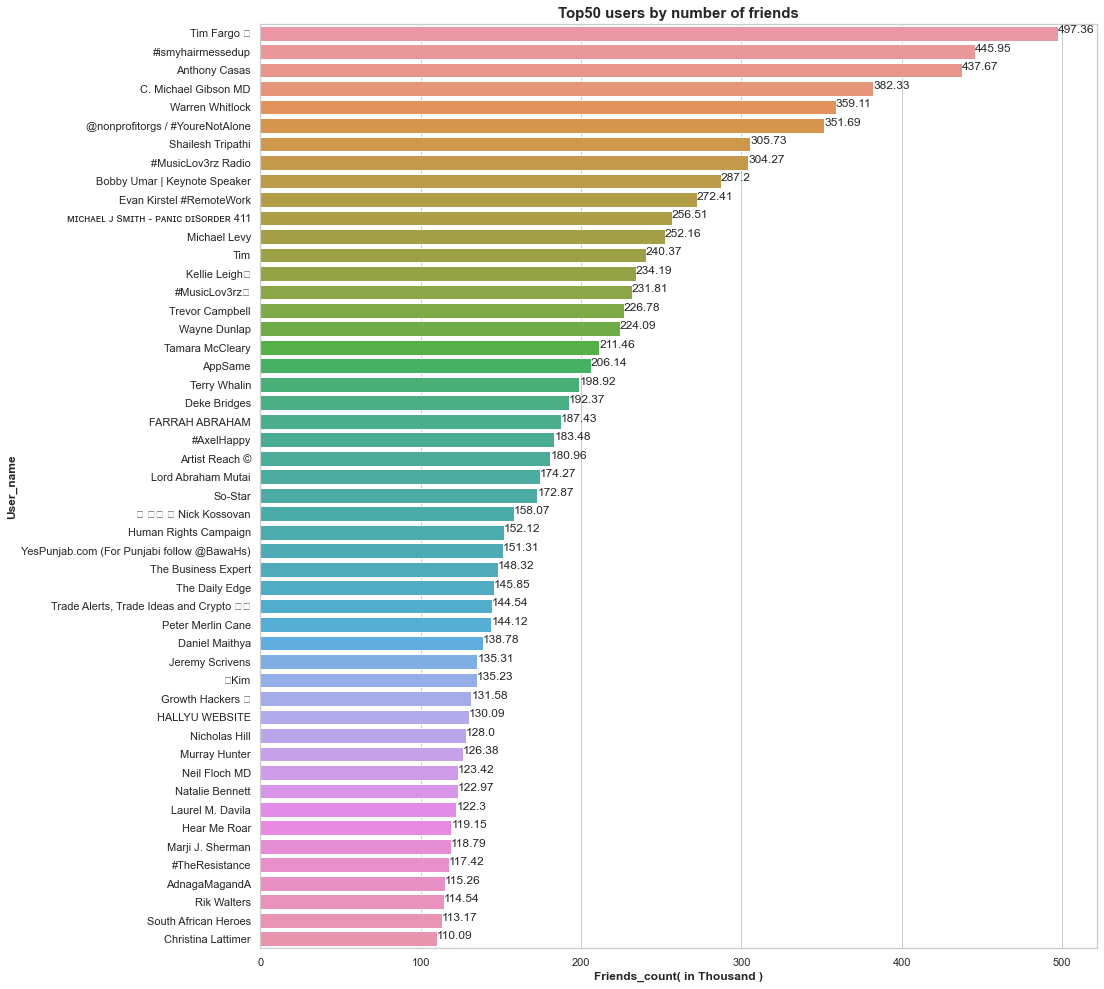

In [20]:
data = df.sort_values('user_friends',ascending=False).drop_duplicates(subset='user_name', keep="first")
data = data[['user_name', 'user_friends', 'tweet_count']]
data.sort_values('user_friends',ascending=False)

data1 = data.head(50).reset_index().copy()
for i in range(50):
    data1['user_friends'][i] = millify(data1['user_friends'][i],precision=2)
    
data1['user_friends'] = data1['user_friends'].str[:-1].astype(float) # To remove 'k'

plt.figure(figsize=(15, 17))
sns.barplot(y='user_name',x='user_friends',data=data1.head(50))
y=data1['user_friends'].head(50)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top50 users by number of friends',weight='bold', size=15)
plt.ylabel('User_name', size=12, weight='bold')
plt.xlabel('Friends_count( in Thousand )', size=12, weight='bold')
plt.show()

In [21]:
fig = px.treemap(data1.head(50), path=['user_name'], values='user_friends',
                 title="<b>TreeMap for Top50 users by number of friends</b>",
                 color='tweet_count')

fig.show()


In [22]:
df['user_created'] = pd.to_datetime(df['user_created'])
df['year_created'] = df['user_created'].dt.year

data2 = df['year_created'].value_counts().reset_index().rename(columns = {
    'year_created' : 'count', 'index' : 'year_added'}).sort_values('year_added')[1:] # Since twitter was started from 2006
data2['percent'] = data2['count'].apply(lambda x : 100*x/sum(data2['count']))

t1 = go.Scatter(x=data2['year_added'], y=data2["count"], marker=dict(color="#a678de"))

layout = go.Layout(title="<b>Users added over the years</b>", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(t1, layout=layout)
fig.update_layout(xaxis_title="Year", yaxis_title="Users",title_x=0.5)
fig.show()

In [23]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature),weight='bold', size=15)
    plt.ylabel('Frequency', size=12, weight='bold')
    plt.xlabel(title, size=12, weight='bold')
    plt.xticks(rotation=90)
    plt.show()


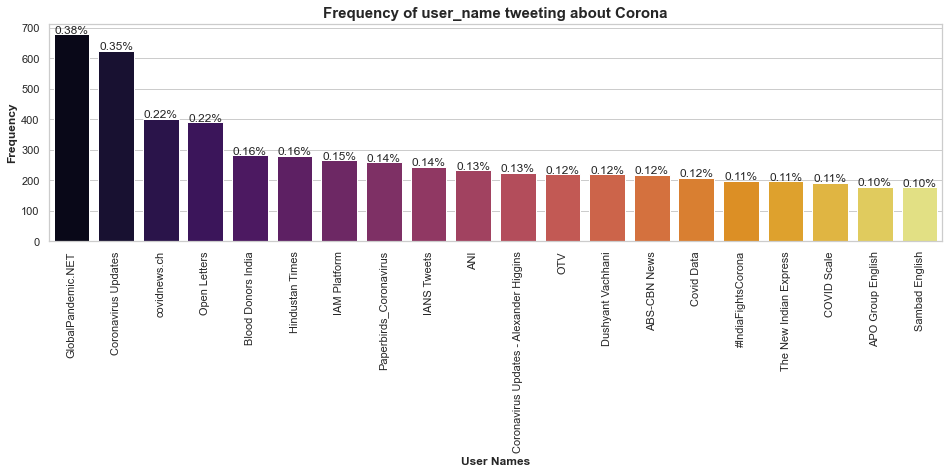

In [24]:
plot_frequency_charts(df, 'user_name', 'User Names','inferno')


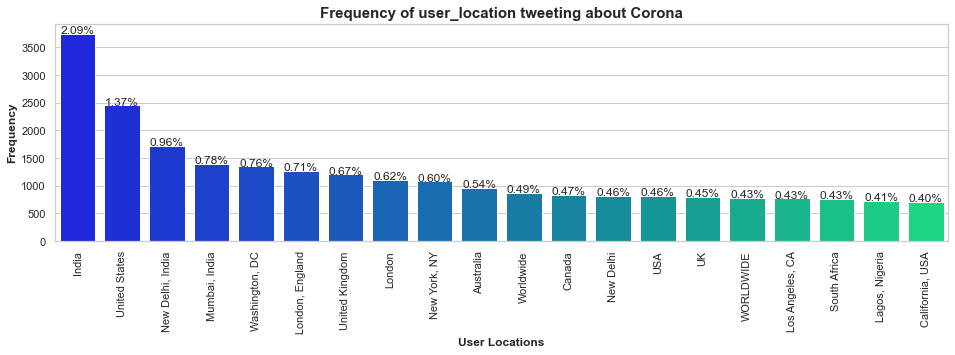

In [25]:
plot_frequency_charts(df, 'user_location', 'User Locations', 'winter')

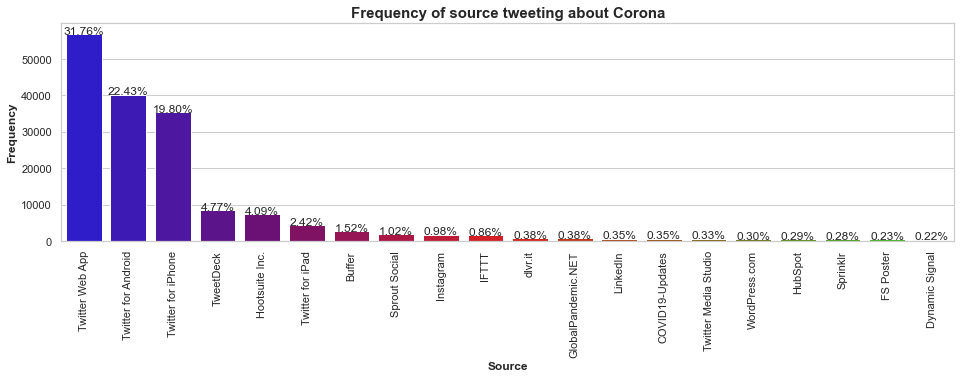

In [26]:
plot_frequency_charts(df, 'source','Source', 'brg')

In [27]:
loc_analysis = pd.DataFrame(df['user_location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'user_location':'count'})
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

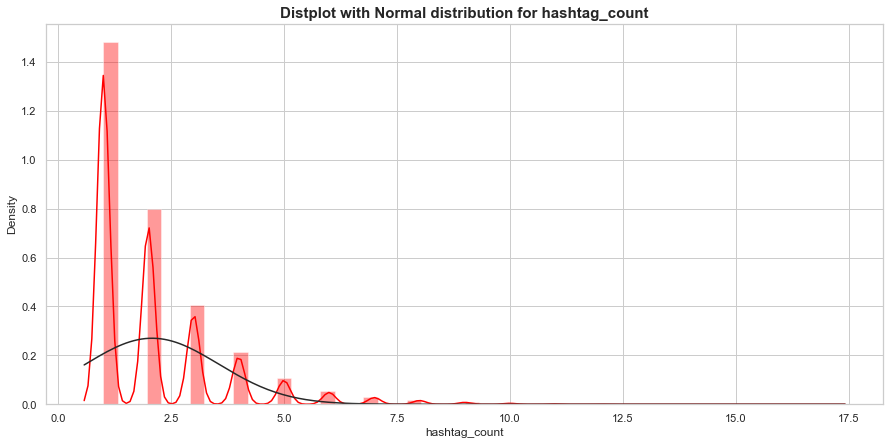

In [28]:
df1 = df.copy()
df1 = df1[df1['hashtags'].notna()] # to get non null values 
df1['hashtag_count'] = df1['hashtags'].apply(lambda x: len(x.split(',')))
plt.figure(figsize=(15,7))
sns.distplot(df1['hashtag_count'],fit=norm,kde=True, color='red')
plt.title('Distplot with Normal distribution for hashtag_count',fontweight="bold",size=15)
plt.show()


In [29]:
df['datedt'] = pd.to_datetime(df['date'])

df['year'] = df['datedt'].dt.year
df['month'] = df['datedt'].dt.month
df['day'] = df['datedt'].dt.day
df['day_name'] = df['datedt'].dt.day_name()
df['hour'] = df['datedt'].dt.hour
df['minute'] = df['datedt'].dt.minute
df['dayofyear'] = df['datedt'].dt.dayofyear
df['date_only'] = df['datedt'].dt.date

In [4]:
def countplot(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(15,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title),weight='bold', size=17)
    if(size > 2):
        plt.xticks(rotation=90, size=10)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.xlabel(feature, size=12, weight='bold')
    plt.ylabel('Count', size=12, weight='bold')
    plt.show() 


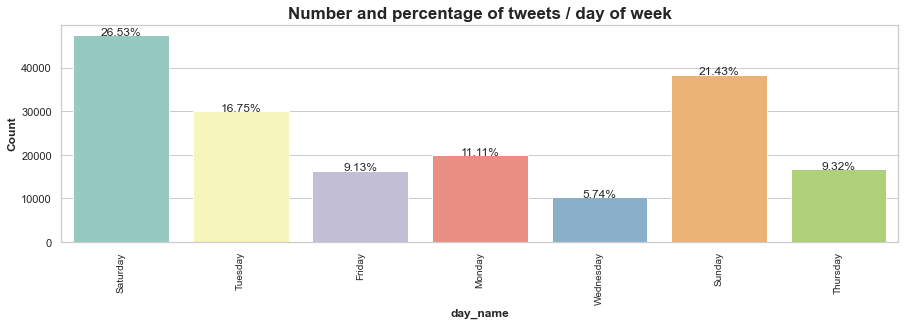

In [31]:
countplot("day_name", "tweets / day of week", df, size=3, ordered=False)

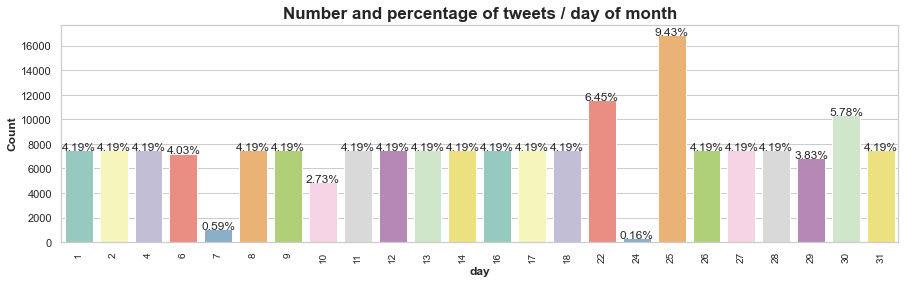

In [32]:
countplot("day", "tweets / day of month", df, size=3, ordered=False)

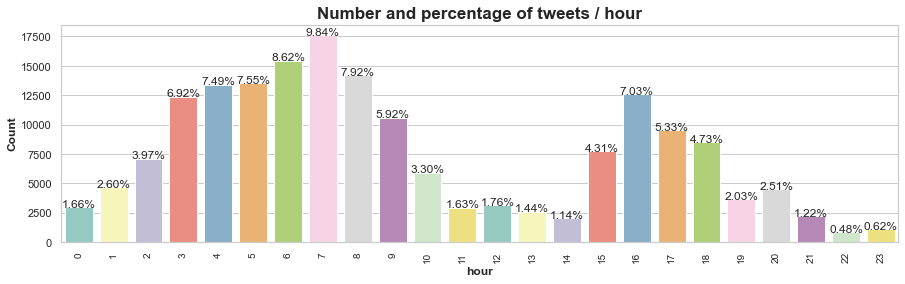

In [33]:
countplot("hour", "tweets / hour", df,size=4, ordered=False)

In [34]:
df = df.fillna('None')

def wordcloud(string,title,color):
    wc = WordCloud(background_color=color, width=1200,height=600,mask=None,random_state=1,
                   max_font_size=200,stopwords=stop_words,collocations=False).generate(string)
    fig=plt.figure(figsize=(20,8))
    plt.axis('off')
    plt.title('--- WordCloud for {} --- '.format(title),weight='bold', size=30)
    plt.imshow(wc)

In [35]:
stop_words=set(STOPWORDS)
source_string = " ".join(df['source'].astype('str'))
hastage_string = " ".join(df['hashtags'].astype('str'))
location_string = " ".join(df['user_location'].astype('str'))

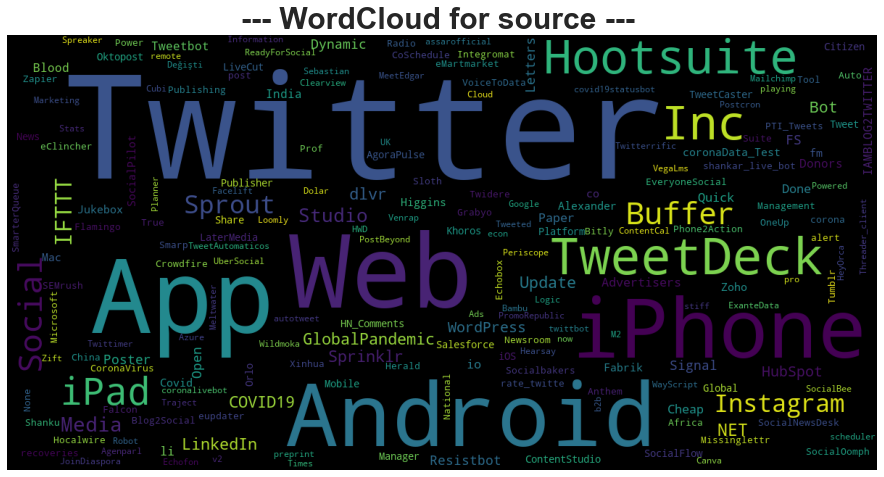

In [36]:
wordcloud(source_string,'source','black')

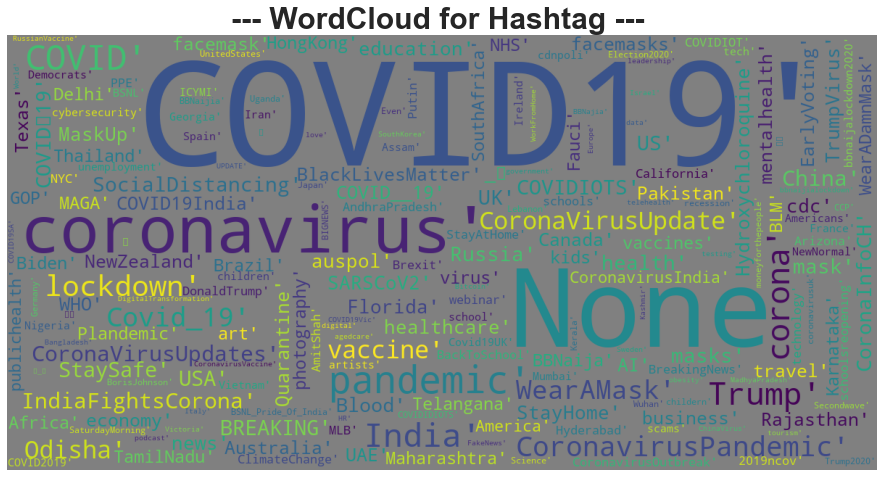

In [37]:
wordcloud(hastage_string,'Hashtag','grey')

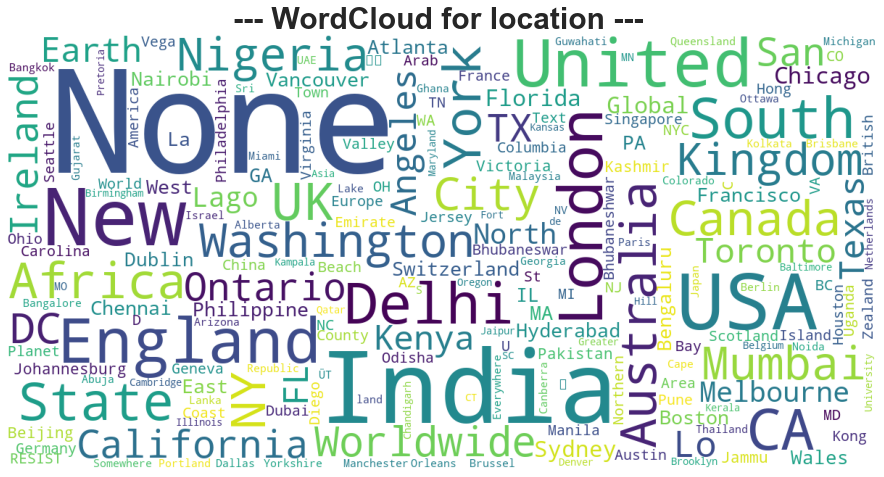

In [38]:
wordcloud(location_string,'location','white')

In [3]:
a=3
b=4
a+b

7